In [1]:
import tmol.utility.numba
from tmol.utility.reactive import reactive_attrs, reactive_property

from tmol.tests.benchmark import make_fixture, make_subfixture, stat_frame, subfixture

In [2]:
import seaborn
from matplotlib import pyplot

In [12]:
import torch

import tmol.score.ljlk.numba_potential as numba_potential
import tmol.score

ljlk_resolver = tmol.score.ljlk.params.LJLKParamResolver.from_database(tmol.database.ParameterDatabase.get_default().scoring.ljlk, torch.device("cpu"))
ljlk_params = dict(
 lj_sigma=   ljlk_resolver.pair_params.lj_sigma,
 lj_switch_slope=   ljlk_resolver.pair_params.lj_switch_slope,
 lj_switch_intercept=   ljlk_resolver.pair_params.lj_switch_intercept,
 lj_coeff_sigma12=   ljlk_resolver.pair_params.lj_coeff_sigma12,
 lj_coeff_sigma6=   ljlk_resolver.pair_params.lj_coeff_sigma6,
 lj_spline_y0=   ljlk_resolver.pair_params.lj_spline_y0,
 lj_spline_dy0=   ljlk_resolver.pair_params.lj_spline_dy0,
  
 lj_switch_dis2sigma=   ljlk_resolver.global_params.lj_switch_dis2sigma,
 spline_start=   ljlk_resolver.global_params.spline_start,
 max_dis=   ljlk_resolver.global_params.max_dis,
)

x = torch.zeros((1, 3))
y = torch.zeros((1000, 3))
y[:, 0] = torch.linspace(0, ljlk_resolver.global_params.max_dis + 1, 1000)

xt = torch.full((x.shape[0],), 1, dtype=torch.int64)
yt = torch.full((y.shape[0],), 1, dtype=torch.int64)
news = tmol.score.ljlk.numba_potential.lj_kernel(
        x, xt, y, yt, torch.full((1, 1000), 10, dtype=torch.uint8), **ljlk_params)

olds = tmol.score.ljlk.potentials.lj_score(
    y[:, 0],
    torch.full((1, 1000), 10, dtype=torch.uint8),
     lj_sigma=   ljlk_resolver.pair_params.lj_sigma[xt, yt],
     lj_switch_slope=   ljlk_resolver.pair_params.lj_switch_slope[xt, yt],
     lj_switch_intercept=   ljlk_resolver.pair_params.lj_switch_intercept[xt, yt],
     lj_coeff_sigma12=   ljlk_resolver.pair_params.lj_coeff_sigma12[xt, yt],
     lj_coeff_sigma6=   ljlk_resolver.pair_params.lj_coeff_sigma6[xt, yt],
     lj_spline_y0=   ljlk_resolver.pair_params.lj_spline_y0[xt, yt],
     lj_spline_dy0=   ljlk_resolver.pair_params.lj_spline_dy0[xt, yt],
    
     lj_switch_dis2sigma=   ljlk_resolver.global_params.lj_switch_dis2sigma,
     spline_start=   ljlk_resolver.global_params.spline_start,
     max_dis=   ljlk_resolver.global_params.max_dis,
)

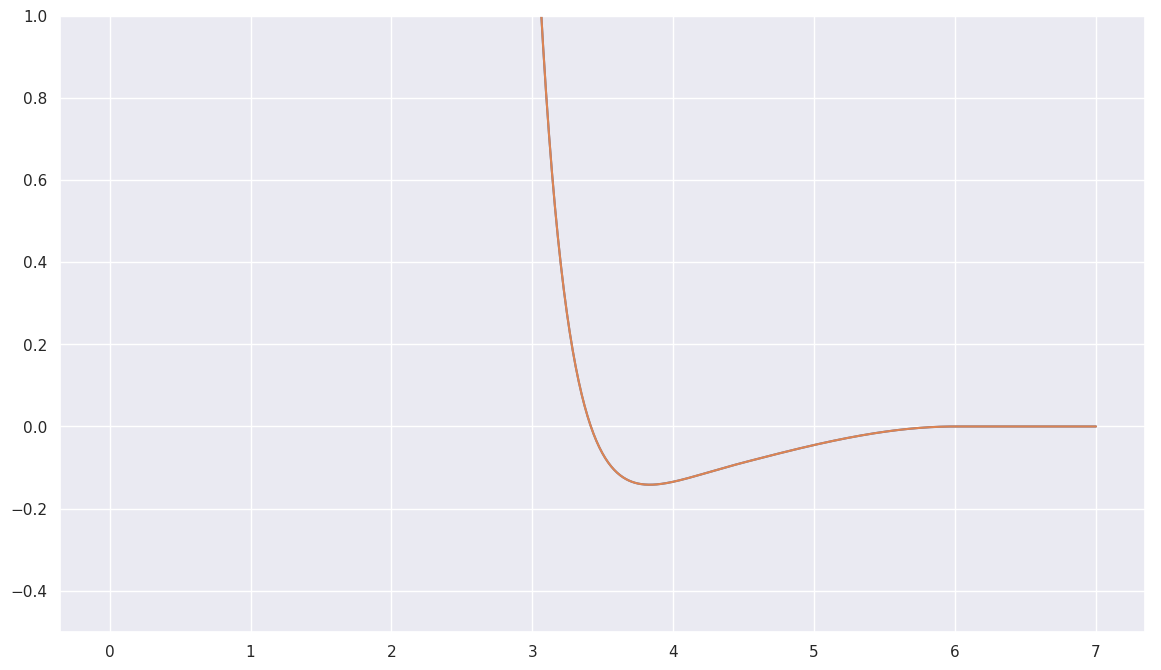

In [13]:
pyplot.ylim((-.5, 1))
seaborn.lineplot(
    y[:,0],
    news[0],
)
seaborn.lineplot(
    y[:,0],
    olds[0],
)

In [23]:
cr = numba_potential.lj_potential

In [31]:
co = list(cr.overloads.values())[0]

In [32]:
import IPython.display
import io

sf = io.StringIO()
co.type_annotation.html_annotate(sf)

IPython.display.display_html(sf.getvalue(), raw=True)

label 0
"8: dist,"
"9: bonded_path_length,"
10: # Pair score parameters
"11: lj_sigma: float,"
"12: lj_switch_slope: float,"
"13: lj_switch_intercept: float,"
"14: lj_coeff_sigma12: float,"
"15: lj_coeff_sigma6: float,"
"16: lj_spline_y0: float,"
"17: lj_spline_dy0: float,"
